## Homework assignment 3  - Scientific Computing I

### Scipy and matplotlib

1. Read "Week 4 - Scipy.ipynb" and "Week 5 - Matplotlib.ipynb" on Canvas.

2. Answer the following questions in the answer lines. 

3. Write simple python codes to realize the requested functions.

## Questions (5 points)

Part A: Scipy.

1. The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Please provide at least three tasks we learned that are handled by SciPy.

- Numerical integration
- Numerical optimization
- Function approximation
- Statistical functions

2. We can use the scipy.optimize.fmin_bfgs() function to find the minima of a function. Please describe in words a strategy to find the global minimum of a funtion f(x) for x in a given range. 

First, we must define a function $f(x)$ that is continuous in a range from $a$ to $b$.
Next, we create a variable for the global minimum equal to infinity.
Then we repeatedly test [`scipy.optimize.fmin_bfgs(f, n)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html) in equal intervals for some value `n` within the given range.
If the result is less than the global minimum, then we set the global minimum to the obtained value.
The number of times we repeat this process depends on the precision $N$.

This is better shown in practice.
Here is an example of trying to approximate a function $f(x) = x \sin{x}$ in the range [-1, 6].
If we try to optimize using a random initial guess, it is possible we will find a local minimum.
So we have to test multiple points and take the minimum value.

In [1]:
# %%capture
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.sin(x) * x

# Define the range in which we want to find the global minimum of f(x).
a = -1.0
b = 6.0
N = 10
f_range = np.linspace(a, b, N)

# Initialize the global minimum to (0, Infinity)
global_min_x, global_min_y = (0, np.inf)

# Define the x range to be plotted
x = np.linspace(-25, 25, 1000)

for n in f_range:
    # Use full_output to obtain both xopt and fopt (The optimal x and f(x) values).
    # Set disp=False to suppress output. Alternatively, use the %%capture magic command if within an IPython environment.
    
    xopt, fopt, gopt, Bopt, func_calls, grad_calls, warn_flag = scipy.optimize.fmin_bfgs(f, n, full_output=True, disp=False)
    
    if fopt < global_min_y:
        global_min_x, global_min_y = (xopt, fopt)

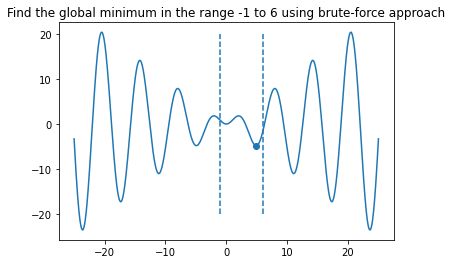

In [2]:
fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.vlines([a, b], -20, 20, linestyle='dashed')
ax.scatter(global_min_x, global_min_y)
ax.set_title('Find the global minimum in the range -1 to 6 using brute-force approach')
plt.show()

Part B: Matplotlib

1. To use the Matplotlib object-oriented API to make a plot, we need to create two types of objects. Please describe them.

For the Matplotlib object-oriented plotting API, we need to create two objects:

- The Figure object - represents the final image which may contain at least one or more Axes objects.
- The Axes object - represents an individual plot within the Figure object.

2. We can define the colors of lines and other graphical elements in two ways. Please describe them.

There are two ways to represent colors in Matplotlib:

- By their names, e.g. "red" (or "r" for short).
- By their corresponding RGB hex code, e.g. "#ff0000" (red).

3. Please describes how to make four subplots on a canvas with a 2x2 setup.

To make four subplots on a canvas with a 2x2 setup, we can use [`matplotlib.pyplot.subplots(2, 2)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

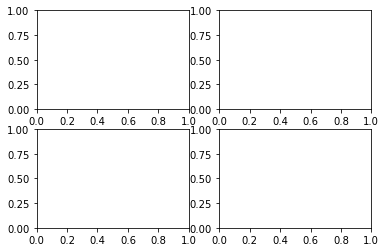

In [3]:
fig, ax = plt.subplots(2,2)

We can add plots into the canvas like so:

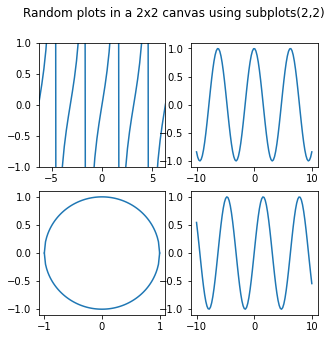

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(5, 5))
fig.suptitle('Random plots in a 2x2 canvas using subplots(2,2)')
x = np.linspace(-10, 10, 100)

# Plot tan(x) in top-left subplot.
ax[0,0].plot(x, np.tan(x))
ax[0,0].set_xlim(-2*np.pi, 2*np.pi)
ax[0,0].set_ylim(-1, 1)

# Plot cos(x) in top-right subplot.
ax[0,1].plot(x, np.cos(x))

# Plot sin(x) in bottom-right subplot.
ax[1,1].plot(x, np.sin(x))

# Plot a circle in bottom-left subplot.
# 'C0' is the first color in the default color cycle.
# 'C1' is the next color in the cycle and so on.
x = np.linspace(-0.999999, 0.999999, 100)
ax[1,0].plot(x, (lambda x: np.sqrt(1 - x**2))(x), color='C0')   # Top half of circle
ax[1,0].plot(x, (lambda x: -np.sqrt(1 - x**2))(x), color='C0')  # Bottom half of circle

plt.show()

Alternatively, we can use [`matplotlib.pyplot.figure()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) in conjunction with [`Figure.add_subplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot) like so:

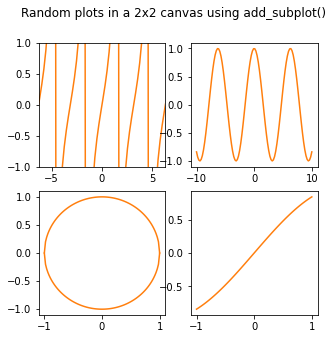

In [5]:
fig = plt.figure(figsize=(5, 5))
fig.suptitle('Random plots in a 2x2 canvas using add_subplot()')
x = np.linspace(-10, 10, 100)

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_xlim(-2*np.pi, 2*np.pi)
ax1.set_ylim(-1, 1)
ax1.plot(x, np.tan(x), color='C1')

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(x, np.cos(x), color='C1')

x = np.linspace(-0.999999, 0.999999, 100)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(x, (lambda x: np.sqrt(1 - x**2))(x), color='C1')   # Top half of circle
ax3.plot(x, (lambda x: -np.sqrt(1 - x**2))(x), color='C1')  # Bottom half of circle

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(x, np.sin(x), color='C1')

plt.show()

## Python programming (15 points)

1. Define a function: $f(x) = 4x^{2}+(x-4)^{3}-3x^{4}$. Show the function in the range between x = -4 and x = 4 using matplotlib.

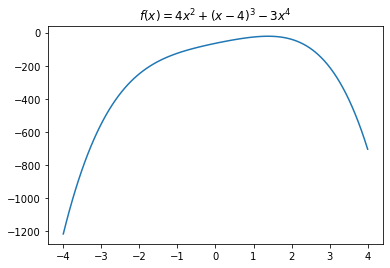

In [6]:
def f(x):
    return 4*x**2 + (x - 4)**3 - 3*x**4

x = np.linspace(-4, 4, 100)
plt.plot(x, f(x))
plt.title('$f(x) = 4x^2 + (x - 4)^3 - 3x^4$')
plt.show()

2. Find the maximum of the above function. Hint: You will need the scipy.optimize function, but note that it can only find the minima of a function. 

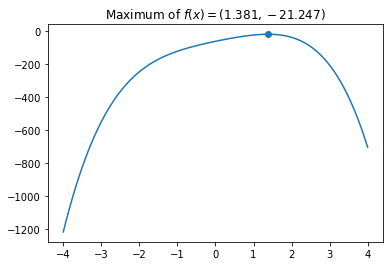

In [7]:
def g(x):
    return -f(x)
[xopt] = scipy.optimize.fmin_bfgs(g, 0, disp=False)
fopt = f(xopt)

plt.plot(x, f(x))
plt.scatter(xopt, fopt)
plt.title(f'Maximum of $f(x) = {(np.round(xopt, decimals=3), np.round(fopt, decimals=3))}$')
plt.show()

3. We learned that we could create an object associated with a (continous) random variable with normal distribution by using the stats.norm() function. The default mean is 0 and standard deviation is 1.

Now it's a time to improve your programming skill by learning from online libraries. Please refer to:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

Please change the mean of the normal distribution to 1 and its standard deviation to 2.

Plot the probability distribution function of this distribution for x between -10 and 10.

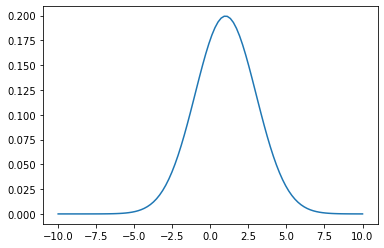

In [8]:
import scipy.stats

x = np.linspace(-10, 10, 100)
Y = scipy.stats.norm(loc=1, scale=2)

plt.plot(x, Y.pdf(x))
plt.show()

## Extra Credits (5 points)

Let's go back to the "temperature.dat" file (attached in the same directory as this homework) and do some research. The data format for each column is: year, month, day, daily average temperature, low, high, location. 

Calculate the average temperature of each year (based on daily average temperature) from 1800 to 2011 and show the data in a plot (choose whatever plot form you find proper). Describe in words your observation.


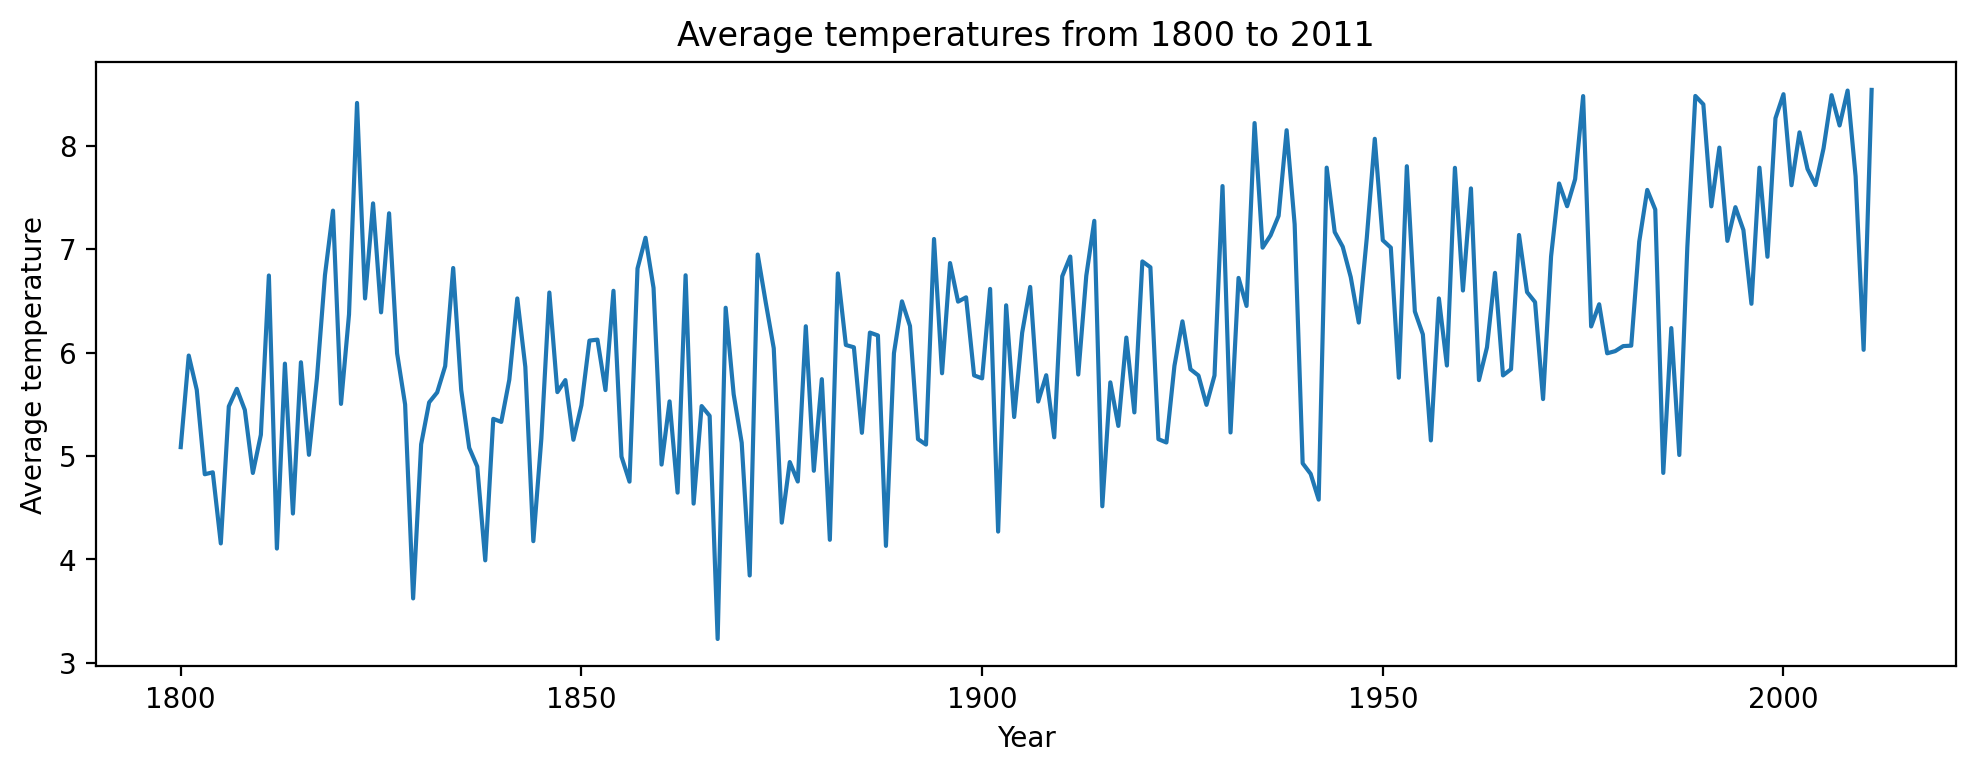

In [9]:
data = np.genfromtxt('temperature.dat')

# Assign names to corresponding columns
years = data[:,0]
temperature = data[:,3]

# Keep track of the temperature for each year
year_temperatures = {}

for year, temp in zip(years, temperature):
    if year in year_temperatures:
        year_temperatures[year].append(temp)
    else:
        year_temperatures[year] = [temp]

# Average temperature of each year
avgs = [np.mean(temps) for year, temps in year_temperatures.items()]

# Plot the averages
fig = plt.figure(dpi=200, figsize=(12,4))
ax = fig.add_subplot()
ax.set_title('Average temperatures from 1800 to 2011')
ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.plot(year_temperatures.keys(), avgs)
plt.show()

From the data provided by `temperature.dat`, we can visually observe that the average temperature is steadily increasing over time.
That is, there is a positive trend in average temperature from 1800 to 2011.